# Práctica. Regresión Polinomial
Francisco Pineda Hernández

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
datos = pd.read_csv('datos.csv')
datos

,x,y
0,-3.292157,-44.608971
1,-0.936214,0.623178
2,-3.602674,-58.873048
3,-0.850265,-6.057589
4,2.309657,-3.967128
...,...,...
95,5.878571,36.139165
96,2.117848,-8.607422
97,0.430170,-3.414761
98,-0.315372,-1.059461


In [28]:
for i in range(len(datos)):
    print(datos['x'].iloc[i])

-3.2921570379029923
-0.9362139523172176
-3.602673970449903
-0.8502652525767682
2.3096565553806734
1.567869286517366
-0.2831131754409801
0.6684103017637231
-2.482237219472818
1.060796895047296
9.658969447502235
-0.5933085965785172
-4.809263871962823
1.8627244480956615
-2.5983376430753724
1.535157722909251
4.6633572428903385
3.043736447978458
-1.6908720421831624
3.161980452223857
5.145658895201278
7.118810571875038
3.5289565452549603
5.758386080149778
6.841693542673855
4.686399683581027
3.532415412706619
2.0845466850159644
1.8004483328504963
3.902966281042891
4.017381343327854
4.439438846133362
1.4677215732387414
6.890595040898134
4.721895093149726
-0.1872716865326107
-1.4182020536299025
0.7929750764673531
4.612391447545646
2.934657596382118
5.49544952235007
0.6030126808086205
-2.4647565813867995
-1.536338713478952
5.212257864531628
3.209530840919539
1.375175065769419
0.9309008084767942
1.9684999378375383
1.61926372188914
-3.6494520911687633
5.811454995457201
5.51937021534248
3.240856942

In [10]:
from sklearn.model_selection import train_test_split

X = datos[['x']]   # X debe ser un DataFrame
y = datos['y']     # y puede ser una Serie

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=0
)


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
#      smoooooooooooooooooooooooooooooooooooooooooooooooooooooooooothh
import operator

## Regresión líneal con OLS

c:\Users\packo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


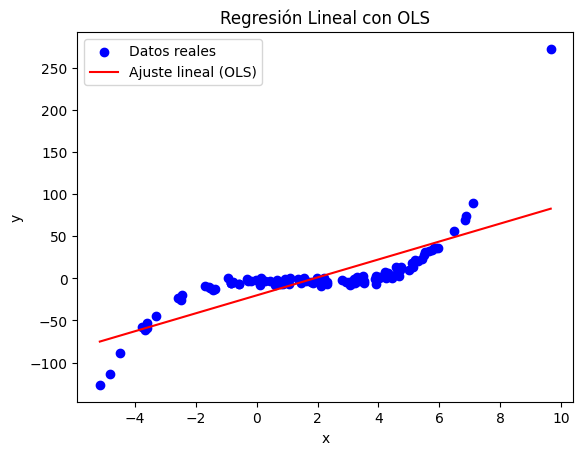

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X, y, color='blue', label='Datos reales')

# Crear una línea de valores ordenados para graficar la recta de regresión
x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = model.predict(x_plot)

# Graficar la línea de regresión
plt.plot(x_plot, y_plot, color='red', label='Ajuste lineal (OLS)')

# Etiquetas y leyenda
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Lineal con OLS')
plt.legend()
plt.show()

## Regresión polinomial de grado 2 con OLS

Intercepto: -25.436031565811472
Coeficientes: [0.         7.52755995 0.89999702]
Ecuación del modelo:
y = -25.436 + 0.000*x + 7.528*x²
R² en test: 0.6664874659184128


c:\Users\packo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


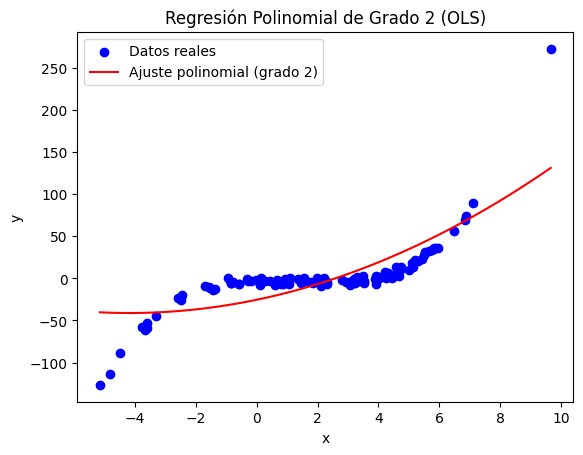

In [15]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal (OLS)
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predicciones
y_pred = model.predict(X_poly_test)

# Coeficientes y ecuación resultante
print("Intercepto:", model.intercept_)
print("Coeficientes:", model.coef_)
print("Ecuación del modelo:")
print(f"y = {model.intercept_:.3f} + {model.coef_[0]:.3f}*x + {model.coef_[1]:.3f}*x²")

# Evaluación del modelo
r2 = model.score(X_poly_test, y_test)
print("R² en test:", r2)

# Visualización
plt.scatter(X, y, color='blue', label='Datos reales')
x_plot = np.linspace(X.min(), X.max(), 100)
x_plot_poly = poly.transform(x_plot)
y_plot = model.predict(x_plot_poly)
plt.plot(x_plot, y_plot, color='red', label='Ajuste polinomial (grado 2)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Polinomial de Grado 2 (OLS)')
plt.show()

## Regresión polinomial de grado 3 con OLS

Intercepto: -2.5120821464911463
Coeficientes: [ 0.          0.9102488  -2.00399169  0.50530549]
Ecuación del modelo:
y = -2.512 + 0.000*x + 0.910*x²
R² en test: 0.9919679186464004


c:\Users\packo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


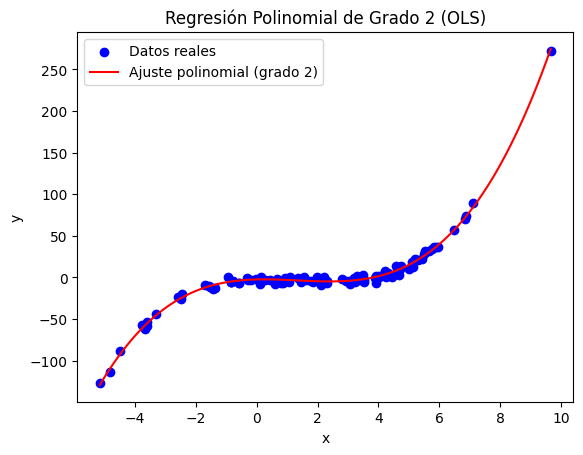

In [16]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal (OLS)
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predicciones
y_pred = model.predict(X_poly_test)

# Coeficientes y ecuación resultante
print("Intercepto:", model.intercept_)
print("Coeficientes:", model.coef_)
print("Ecuación del modelo:")
print(f"y = {model.intercept_:.3f} + {model.coef_[0]:.3f}*x + {model.coef_[1]:.3f}*x²")

# Evaluación del modelo
r2 = model.score(X_poly_test, y_test)
print("R² en test:", r2)

# Visualización
plt.scatter(X, y, color='blue', label='Datos reales')
x_plot = np.linspace(X.min(), X.max(), 100)
x_plot_poly = poly.transform(x_plot)
y_plot = model.predict(x_plot_poly)
plt.plot(x_plot, y_plot, color='red', label='Ajuste polinomial (grado 2)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Polinomial de Grado 2 (OLS)')
plt.show()

## Regresión líneal con SGD

## Regresión polinomial de grado 2 con SGD

## Regresión polinomial de grado 3 con SGD

In [19]:
poly = SGDRegressor()
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal (OLS)
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predicciones
y_pred = model.predict(X_poly_test)

# Coeficientes y ecuación resultante
print("Intercepto:", model.intercept_)
print("Coeficientes:", model.coef_)
print("Ecuación del modelo:")
print(f"y = {model.intercept_:.3f} + {model.coef_[0]:.3f}*x + {model.coef_[1]:.3f}*x²")

# Evaluación del modelo
r2 = model.score(X_poly_test, y_test)
print("R² en test:", r2)

# Visualización
plt.scatter(X, y, color='blue', label='Datos reales')
x_plot = np.linspace(X.min(), X.max(), 100)
x_plot_poly = poly.transform(x_plot)
y_plot = model.predict(x_plot_poly)
plt.plot(x_plot, y_plot, color='red', label='Ajuste polinomial (grado 2)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Polinomial de Grado 2 (OLS)')
plt.show()

AttributeError: 'SGDRegressor' object has no attribute 'fit_transform'